# Imports

In [1]:
# python files that contain the functions to aquire and prep the data
import acquire
import prepare

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#imports for model object and metric functions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Acquire

In [2]:
df = acquire.get_telco_data()


In [3]:
df.head().T


,0,1,2,3,4
contract_type_id,1,1,1,1,1
internet_service_type_id,1,1,1,1,1
payment_type_id,2,4,1,1,3
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No


In [4]:
df.shape



(7043, 24)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contract_type_id          7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
#here we see that total charges is an object data type, so we will need to convert it to numeric in prepare


In [7]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
#we can see here we are getting summary statistics on features that have any number at all, so we need to drop those columns or encode them properly


In [9]:
#Our target variable is churn so lets count how many customers have churned and how many have not churned

df.churn.value_counts()



No     5174
Yes    1869
Name: churn, dtype: int64

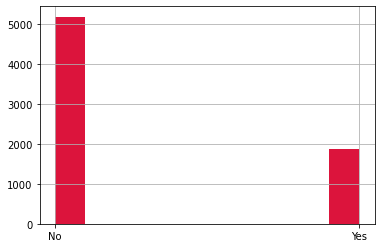

In [10]:
df['churn'].hist(color='crimson')
plt.show()



In [11]:
# categorical and quantitative variables
cat_vars = ['senior_citizen', 'partner', 'dependents', 'internet_service_type', 
                    'phone_service', 'multiple_lines', 'gender', 'contract_type', 'tech_support',  
                    'streaming_tv', 'streaming_movies']

quant_vars = ['tenure', 'monthly_charges']

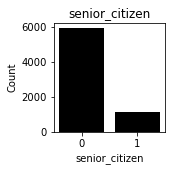

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


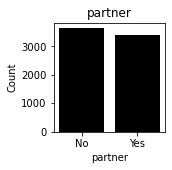

    partner  Count  Percent
No       No   3641     51.7
Yes     Yes   3402     48.3
_________________________________________________________________


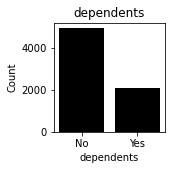

    dependents  Count  Percent
No          No   4933    70.04
Yes        Yes   2110    29.96
_________________________________________________________________


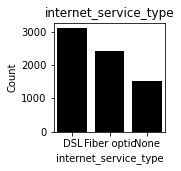

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


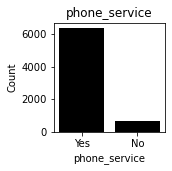

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


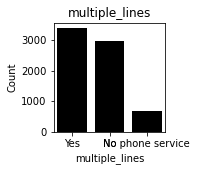

                    multiple_lines  Count  Percent
No                             Yes   3390    48.13
Yes                             No   2971    42.18
No phone service  No phone service    682     9.68
_________________________________________________________________


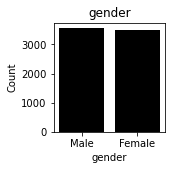

        gender  Count  Percent
Male      Male   3555    50.48
Female  Female   3488    49.52
_________________________________________________________________


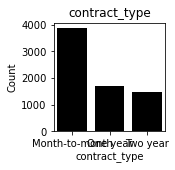

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


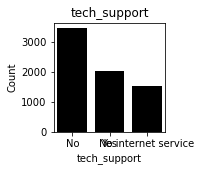

                            tech_support  Count  Percent
No                                    No   3473    49.31
Yes                                  Yes   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


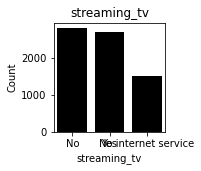

                            streaming_tv  Count  Percent
No                                    No   2810    39.90
Yes                                  Yes   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


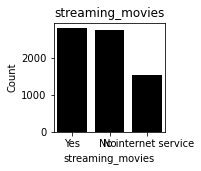

                        streaming_movies  Count  Percent
No                                   Yes   2785    39.54
Yes                                   No   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


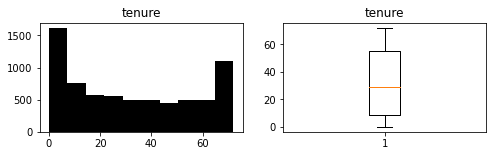

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


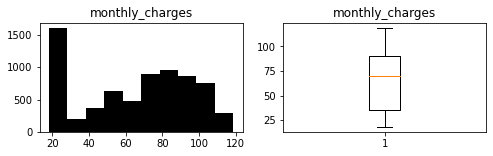

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


In [12]:
def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color=("black"))
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color="black")
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

explore_univariate(df, cat_vars, quant_vars)

# Prepare

In [13]:
#plan:
#drop 
#contractid, internetservicetypeid, paymenttypeid
print('contract_type_id - drop column')
print('internet_service_type_id - drop column')
print('payment_type_id - drop column')

#drop after making new features
# phoneservice, multiplelines, streamingtv, streamingmovies
print('phone_service - drop after new feature')
print('multiple_lines - drop after new feature')
print('streaming_tv - drop after new feature')
print('streaming_movies - drop after new feature')
     
#encode 0, 0, 1 (zero twice bc no internet service is the same as no add on)
print('online_security - change to 0/0/1')
print('online_backup - change to 0/0/1')
print('device_protection - change to 0/0/1')
print('tech_support - change to 0/0/1')
 
#encode 0, 1, 2
print('payment_type - change to 0/1/2')
print('internet_service_type - change to 0/1/2')
print('contract_type- change to 0/1/2')

#new attribute
print('gender - make femal column where 0 is male and 1 is female')  
   
#encode yes/no to 0/1
print('senior_citizen - change to 0/1')
print('partner - change to 0/1')
print('dependents - change to 0/1')
print('paperless_billing - change to 0/1')
print('churn - change to 0/1')
 
#change from object to numeric
print('total_charges - change object to numeric')

#leave alone
print('monthly_charges - dont touch')
print('customer_id - dont touch, but move to index')
      
#make new feature "years"
print('tenure - new feature years')




contract_type_id - drop column
internet_service_type_id - drop column
payment_type_id - drop column
phone_service - drop after new feature
multiple_lines - drop after new feature
streaming_tv - drop after new feature
streaming_movies - drop after new feature
online_security - change to 0/0/1
online_backup - change to 0/0/1
device_protection - change to 0/0/1
tech_support - change to 0/0/1
payment_type - change to 0/1/2
internet_service_type - change to 0/1/2
contract_type- change to 0/1/2
gender - make femal column where 0 is male and 1 is female
senior_citizen - change to 0/1
partner - change to 0/1
dependents - change to 0/1
paperless_billing - change to 0/1
churn - change to 0/1
total_charges - change object to numeric
monthly_charges - dont touch
customer_id - dont touch, but move to index
tenure - new feature years


In [14]:
#function to drop unneccessary columns
def drop_cols():
    df.drop(columns = ['contract_type_id', 'internet_service_type_id', 'payment_type_id'], inplace=True)
drop_cols()

In [15]:
df.head()



,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,internet_service_type,contract_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Mailed check,DSL,Month-to-month
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Credit card (automatic),DSL,Month-to-month
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.2,340.35,No,Electronic check,DSL,Month-to-month
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,No,No,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,DSL,Month-to-month
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,No,No,No,No,30.5,30.5,Yes,Bank transfer (automatic),DSL,Month-to-month


In [16]:
#Many of the features in this data set are object data types holding "yes" or "no".  We will need to encode these to 0 or 1 so we can begin to work with exploring our data.
print(df.columns.to_list())
#List of columns that need to be encoded:
#if df.columns 



['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn', 'payment_type', 'internet_service_type', 'contract_type']


In [17]:


def binary():
    binary_columns = ['partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
    for feature in binary_columns:
        df[feature].replace(to_replace='Yes', value=1, inplace=True)
        df[feature].replace(to_replace='No', value=0, inplace=True)
    print("Features with Yes/No input has been changed to 0 = No and 1 = Yes")

binary()


Features with Yes/No input has been changed to 0 = No and 1 = Yes


In [18]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,internet_service_type,contract_type
0,0003-MKNFE,Male,0,0,0,9,1,Yes,No,No,...,No,No,Yes,0,59.9,542.4,0,Mailed check,DSL,Month-to-month
1,0013-MHZWF,Female,0,0,1,9,1,No,No,No,...,Yes,Yes,Yes,1,69.4,571.45,0,Credit card (automatic),DSL,Month-to-month
2,0015-UOCOJ,Female,1,0,0,7,1,No,Yes,No,...,No,No,No,1,48.2,340.35,0,Electronic check,DSL,Month-to-month
3,0023-HGHWL,Male,1,0,0,1,0,No phone service,No,No,...,No,No,No,1,25.1,25.1,1,Electronic check,DSL,Month-to-month
4,0032-PGELS,Female,0,1,1,1,0,No phone service,Yes,No,...,No,No,No,0,30.5,30.5,1,Bank transfer (automatic),DSL,Month-to-month


In [19]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [20]:
#handle all the add ons
add_ons = ['online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'device_protection']
df[add_ons] = df[add_ons].replace({'No': 0, 'None': 0, 'No internet service': 0, 'Yes': 1})

In [21]:
#change multiple phone lines to numeric
df['phone_lines'] = df['multiple_lines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})



In [22]:
#Change internet service to numeric
#df['internet_service'] = df[['internet_service_type']].replace({'None': 0, 'DSL': 1, 'Fiber optic': 2})

dummy_df = pd.get_dummies(df[['internet_service_type']], dummy_na=False, drop_first=[True, True])
df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing,monthly_charges,total_charges,churn,payment_type,internet_service_type,contract_type,phone_lines,internet_service_type_Fiber optic,internet_service_type_None
0,0003-MKNFE,Male,0,0,0,9,1,Yes,0,0,...,0,59.9,542.4,0,Mailed check,DSL,Month-to-month,2,0,0


In [23]:
df.rename(columns={'internet_service_type_Fiber optic': 'fiber', 'internet_service_type_None': 'no_internet'}, inplace=True)

In [24]:
#contract types
df['contract'] = df[['contract_type']].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})


In [25]:
#change gender to 0/1
# Encode the gender column
df["is_female"] = df[['gender']].replace({'Male': 0, 'Female': 1})



In [26]:
#drop the old categorical columns
df.drop(columns = ['multiple_lines', 'internet_service_type', 'contract_type'], inplace=True)



In [27]:
#encode_columns = ['partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']

#for feature in encode_columns:
    #df[feature].replace(to_replace='Yes', value=1, inplace=True)
    #df[feature].replace(to_replace='No', value=0, inplace=True)
#print("Features with Yes/No input has been changed to 0 = No and 1 = Yes")




In [28]:
df.tail(30)



,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,payment_type,phone_lines,fiber,no_internet,contract,is_female
7013,9537-JALFH,Male,0,1,1,69,1,0,0,0,...,0,19.90,1356.7,0,Bank transfer (automatic),1,0,1,2,0
7014,9548-LERKT,Male,0,1,0,24,1,0,0,0,...,0,19.75,483.15,0,Mailed check,1,0,1,2,0
7015,9565-AXSMR,Male,0,1,1,52,1,0,0,0,...,0,19.20,1054.75,0,Mailed check,1,0,1,2,0
7016,9574-BOSMD,Male,0,1,1,68,1,0,0,0,...,0,25.40,1620.2,0,Bank transfer (automatic),2,0,1,2,0
7017,9585-KKMFD,Male,0,1,1,41,1,0,0,0,...,1,20.00,879.8,0,Mailed check,1,0,1,2,0
7018,9588-YRFHY,Male,0,0,0,49,1,0,0,0,...,1,19.90,1022.6,0,Credit card (automatic),1,0,1,2,0
7019,9593-CVZKR,Female,0,1,1,56,1,0,0,0,...,1,24.45,1385.85,0,Mailed check,2,0,1,2,1
7020,9624-EGDEQ,Female,0,0,0,37,1,0,0,0,...,0,19.80,813.3,0,Mailed check,1,0,1,2,1
7021,9625-RZFUK,Male,0,1,1,63,1,0,0,0,...,0,19.70,1275.85,0,Mailed check,1,0,1,2,0
7022,9631-RXVJM,Male,0,0,0,35,1,0,0,0,...,0,19.25,677.9,0,Mailed check,1,0,1,2,0


In [29]:
#drop gender
df.drop(columns=['gender'], inplace=True)



In [30]:
#drop payment type bc I wont be exploring it
df.drop(columns=['payment_type'], inplace =True)

In [31]:
df.head()



,customer_id,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female
0,0003-MKNFE,0,0,0,9,1,0,0,0,0,...,1,0,59.9,542.4,0,2,0,0,0,0
1,0013-MHZWF,0,0,1,9,1,0,0,0,1,...,1,1,69.4,571.45,0,1,0,0,0,1
2,0015-UOCOJ,1,0,0,7,1,1,0,0,0,...,0,1,48.2,340.35,0,1,0,0,0,1
3,0023-HGHWL,1,0,0,1,0,0,0,0,0,...,0,1,25.1,25.1,1,0,0,0,0,0
4,0032-PGELS,0,1,1,1,0,1,0,0,0,...,0,0,30.5,30.5,1,0,0,0,0,1


In [32]:
#lets change gender from object to numeric
df['total_charges'] = pd.to_numeric(df.total_charges, errors='coerce')



In [33]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   online_security    7043 non-null   int64  
 7   online_backup      7043 non-null   int64  
 8   device_protection  7043 non-null   int64  
 9   tech_support       7043 non-null   int64  
 10  streaming_tv       7043 non-null   int64  
 11  streaming_movies   7043 non-null   int64  
 12  paperless_billing  7043 non-null   int64  
 13  monthly_charges    7043 non-null   float64
 14  total_charges      7032 non-null   float64
 15  churn              7043 non-null   int64  
 16  phone_lines        7043 

In [34]:
#total charges has been changed to numeric type so lets move forward 
#tackle some more features that need encoding



In [35]:
#check for nulls
df.isna().sum()



customer_id           0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
paperless_billing     0
monthly_charges       0
total_charges        11
churn                 0
phone_lines           0
fiber                 0
no_internet           0
contract              0
is_female             0
dtype: int64

In [36]:
#total charges has 11 nulls so lets look into this
df[df.total_charges.isna()]



,customer_id,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female
5086,2923-ARZLG,0,1,1,0,1,0,0,0,0,...,0,1,19.70,NaN,0,1,0,1,1,0
5433,1371-DWPAZ,0,1,1,0,0,1,1,1,1,...,0,0,56.05,NaN,0,0,0,0,2,1
5504,2775-SEFEE,0,0,1,0,1,1,1,0,1,...,0,1,61.90,NaN,0,2,0,0,2,0
5584,4075-WKNIU,0,1,1,0,1,0,1,1,1,...,0,0,73.35,NaN,0,2,0,0,2,1
5603,4472-LVYGI,0,1,1,0,0,1,0,1,1,...,0,1,52.55,NaN,0,0,0,0,2,1
5687,5709-LVOEQ,0,1,1,0,1,1,1,1,0,...,1,0,80.85,NaN,0,1,0,0,2,1
6569,2520-SGTTA,0,1,1,0,1,0,0,0,0,...,0,0,20.00,NaN,0,1,0,1,2,1
6605,3115-CZMZD,0,0,1,0,1,0,0,0,0,...,0,0,20.25,NaN,0,1,0,1,2,0
6615,3213-VVOLG,0,1,1,0,1,0,0,0,0,...,0,0,25.35,NaN,0,2,0,1,2,0
6686,4367-NUYAO,0,1,1,0,1,0,0,0,0,...,0,0,25.75,NaN,0,2,0,1,2,0


In [37]:
#looks like the tenure for these 11 accounts is 0 months, so lets set the total charges to tenure * monthly charges, which is 0 since they have yet to complete a billing cycle. 


In [38]:
df['total_charges'] = df.total_charges.fillna("0.00")



In [39]:
df.total_charges.isna().sum()



0

In [40]:
df[df.total_charges.isna()]
#no nulls we are good to proceed



,customer_id,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female


In [41]:
#add tenure in years
df['tenure_years'] = round((df.tenure / 12), 2)


In [42]:
#set the index to customer id
df = df.set_index('customer_id')

In [43]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,...,paperless_billing,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,0,0,0,0,0,...,0,59.9,542.4,0,2,0,0,0,0,0.75
0013-MHZWF,0,0,1,9,1,0,0,0,1,1,...,1,69.4,571.45,0,1,0,0,0,1,0.75
0015-UOCOJ,1,0,0,7,1,1,0,0,0,0,...,1,48.2,340.35,0,1,0,0,0,1,0.58
0023-HGHWL,1,0,0,1,0,0,0,0,0,0,...,1,25.1,25.1,1,0,0,0,0,0,0.08
0032-PGELS,0,1,1,1,0,1,0,0,0,0,...,0,30.5,30.5,1,0,0,0,0,1,0.08


# Explore

In [44]:
#split 

def telco_split(df):
    # performs train, validate, test split on telco data, stratified by churn
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=666, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=666, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [45]:
train, validate, test = telco_split(df)

### Questions
1. What months do customers churn the most in? What months into service can we target to keep our customers from churning?
2. Are customers more likely to churn depending on theri internet type? What internet services have the highest amount of churners? Are our services operating as described (internet speed)?  Can customers get better internet serice for less somewhere else?
3. Do people who have tech support have a lower rate of churn? How is our customer service rating?  Is there a specific service that requires more tech support?  Can we optimize tech support to the services that need it most?

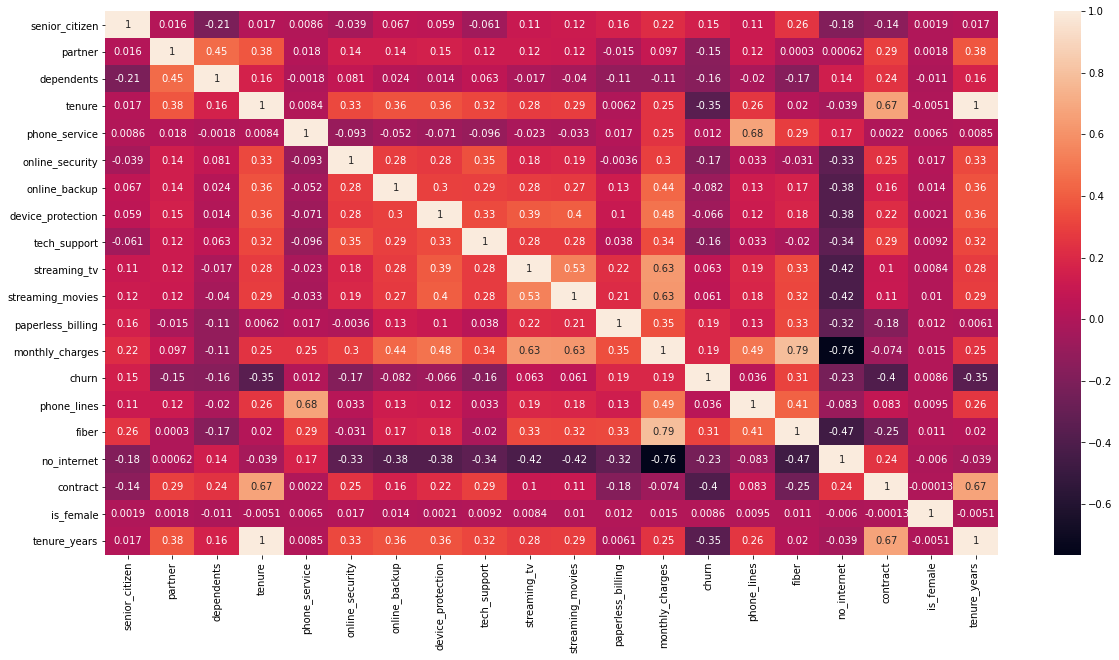

In [46]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df,show_chart=True)

In [47]:
#features we are exploring
train.corr()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years
senior_citizen,1.000000,-0.012814,-0.210609,0.008127,0.003981,-0.020815,0.066624,0.048018,-0.057982,0.090016,0.111579,0.159364,0.220575,0.153990,0.126853,0.257792,-0.186403,-0.153284,0.006855,0.008165
partner,-0.012814,1.000000,0.462670,0.378099,0.015690,0.140200,0.139933,0.159830,0.125051,0.132425,0.119384,-0.016199,0.087650,-0.147741,0.106152,-0.006254,0.023608,0.304335,0.004404,0.378093
dependents,-0.210609,0.462670,1.000000,0.141083,-0.008372,0.082075,0.023725,0.015312,0.055357,-0.002547,-0.031795,-0.101900,-0.105706,-0.142687,-0.036286,-0.151071,0.134834,0.229711,-0.004926,0.141052
tenure,0.008127,0.378099,0.141083,1.000000,-0.000313,0.332330,0.359759,0.352348,0.320058,0.261182,0.268823,0.006366,0.226182,-0.354682,0.252782,0.005667,-0.010232,0.669314,-0.008934,0.999999
phone_service,0.003981,0.015690,-0.008372,-0.000313,1.000000,-0.097216,-0.049698,-0.076532,-0.087578,-0.024895,-0.047911,0.021366,0.249188,0.013804,0.677004,0.290544,0.169725,-0.010350,-0.006605,-0.000286
online_security,-0.020815,0.140200,0.082075,0.332330,-0.097216,1.000000,0.288755,0.265258,0.344441,0.165922,0.179011,-0.005212,0.289281,-0.160158,0.037812,-0.032021,-0.323776,0.240216,0.032856,0.332323
online_backup,0.066624,0.139933,0.023725,0.359759,-0.049698,0.288755,1.000000,0.311718,0.300863,0.294069,0.259529,0.136004,0.446767,-0.079922,0.142685,0.167072,-0.379658,0.154890,0.009794,0.359782
device_protection,0.048018,0.159830,0.015312,0.352348,-0.076532,0.265258,0.311718,1.000000,0.341197,0.386296,0.403164,0.109607,0.479165,-0.070472,0.120957,0.169033,-0.375652,0.205303,0.000798,0.352381
tech_support,-0.057982,0.125051,0.055357,0.320058,-0.087578,0.344441,0.300863,0.341197,1.000000,0.270744,0.278010,0.036250,0.334593,-0.149381,0.040902,-0.029835,-0.329454,0.289902,0.010196,0.320068
streaming_tv,0.090016,0.132425,-0.002547,0.261182,-0.024895,0.165922,0.294069,0.386296,0.270744,1.000000,0.525495,0.217884,0.625983,0.074845,0.178902,0.329477,-0.407349,0.095256,0.000526,0.261195


## Hypothesis 1:  Does having fiber internet have any effect on customer churn?

- Ho:  Having fiber internet is independent of churn
- Ha:  Having fiber internet is not independent of churn

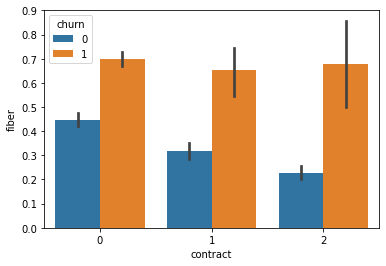

In [108]:
sns.barplot(x = 'contract', y = 'fiber', hue = 'churn', data = train)
plt.show()

In [48]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

In [53]:
#Crosstab:  find the overall proportions, we multiply all the combinations
#of proportions together.  Now we have the expected proportions, we need
#to calculate the actual proportions so that we can compare them.

observed = pd.crosstab(train.fiber, train.churn)
observed

churn,0,1
fiber,,
0,1896,319
1,1001,727


In [61]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---------------------------------\nExpected\n')
print(expected)
print('---------------------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.22f}')

Observed

[[1896  319]
 [1001  727]]
---------------------------------
Expected

[[1627.40426072  587.59573928]
 [1269.59573928  458.40426072]]
---------------------------------

chi^2 = 379.8941
p     = 0.0000000000000000000000


In [58]:
p

1.3122764455071374e-84

### The pvalue is less than the alpha, so we reject our null hypothesis

## Hypothesis 2:  Does tech support have any effect on customer churn?
- Ho:  Having tech support does not effect churn
- Ha:  Having tech support does effect churn

In [49]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

In [50]:
#Crosstab:  find the overall proportions, we multiply all the combinations
#of proportions together.  Now we have the expected proportions, we need
#to calculate the actual proportions so that we can compare them.

observed = pd.crosstab(train.tech_support, train.churn)
observed

churn,0,1
tech_support,,
0,1940,861
1,957,185


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---------------------------------\nExpected\n')
print(expected)
print('---------------------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.25f}')

Observed

[[1940  861]
 [ 957  185]]
---------------------------------
Expected

[[2057.95003804  743.04996196]
 [ 839.04996196  302.95003804]]
---------------------------------

chi^2 = 87.2423
p     = 0.0000000000000000000096007


In [52]:
p

9.600681283864564e-21

### The pvalue is less than the alpha, so we reject our null hypothesis

# Model

## Baseline
- Our prediction for baseline is determined by taking the highest value count from churn

In [95]:
#Value counts of churn
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [96]:
#Train baseline prediction will be those that have not churned
train['baseline_prediction'] = 0

In [97]:
#Baseline accuracy
baseline_accuracy = round((train.churn == 0).mean(),3) *100
baseline_accuracy

73.5

In [118]:
#drop baseline so our array will have same amount of rows and columns:
train.drop(columns='baseline_prediction', inplace=True)

In [119]:
# split our X and y's:
X_train, y_train = train.drop(columns='churn'), train['churn']
X_val, y_val = validate.drop(columns='churn'), validate['churn']

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 5977-CKHON to 7781-HVGMK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     3943 non-null   int64  
 1   partner            3943 non-null   int64  
 2   dependents         3943 non-null   int64  
 3   tenure             3943 non-null   int64  
 4   phone_service      3943 non-null   int64  
 5   online_security    3943 non-null   int64  
 6   online_backup      3943 non-null   int64  
 7   device_protection  3943 non-null   int64  
 8   tech_support       3943 non-null   int64  
 9   streaming_tv       3943 non-null   int64  
 10  streaming_movies   3943 non-null   int64  
 11  paperless_billing  3943 non-null   int64  
 12  monthly_charges    3943 non-null   float64
 13  total_charges      3943 non-null   object 
 14  phone_lines        3943 non-null   int64  
 15  fiber              3943 non-null   uint8  
 16  no_internet   

In [121]:
#make our model
clf = KNeighborsClassifier()

In [122]:
#fit the model

In [123]:

# We are selecting two of the top features that we observed from exploratory data analysis for fitting: fiber and tech support
clf.fit(X_train[['fiber', 'tech_support']], y_train)

KNeighborsClassifier()

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 5977-CKHON to 7781-HVGMK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     3943 non-null   int64  
 1   partner            3943 non-null   int64  
 2   dependents         3943 non-null   int64  
 3   tenure             3943 non-null   int64  
 4   phone_service      3943 non-null   int64  
 5   online_security    3943 non-null   int64  
 6   online_backup      3943 non-null   int64  
 7   device_protection  3943 non-null   int64  
 8   tech_support       3943 non-null   int64  
 9   streaming_tv       3943 non-null   int64  
 10  streaming_movies   3943 non-null   int64  
 11  paperless_billing  3943 non-null   int64  
 12  monthly_charges    3943 non-null   float64
 13  total_charges      3943 non-null   object 
 14  phone_lines        3943 non-null   int64  
 15  fiber              3943 non-null   uint8  
 16  no_internet   

In [125]:
X_train.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'phone_lines', 'fiber',
       'no_internet', 'contract', 'is_female', 'tenure_years'],
      dtype='object')

In [126]:
# make our predictiosn from the model:
y_pred = clf.predict(X_train[['fiber', 'tech_support']])

# Evaluate your results using the model score, confusion matrix, and classification report.

In [127]:
# create a function to calculate these metrics
def get_metrics_binary(clf, X, y):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [128]:

class_report = get_metrics_binary(clf, X_train[['fiber', 'tech_support']], y_train)



ValueError: query data dimension must match training data dimension

In [129]:
train.shape

(3943, 21)

In [130]:
validate.shape

(1691, 21)

In [131]:
test.shape

(1409, 21)

In [ ]:
df.shape

In [113]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 5977-CKHON to 7781-HVGMK
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   senior_citizen       3943 non-null   int64  
 1   partner              3943 non-null   int64  
 2   dependents           3943 non-null   int64  
 3   tenure               3943 non-null   int64  
 4   phone_service        3943 non-null   int64  
 5   online_security      3943 non-null   int64  
 6   online_backup        3943 non-null   int64  
 7   device_protection    3943 non-null   int64  
 8   tech_support         3943 non-null   int64  
 9   streaming_tv         3943 non-null   int64  
 10  streaming_movies     3943 non-null   int64  
 11  paperless_billing    3943 non-null   int64  
 12  monthly_charges      3943 non-null   float64
 13  total_charges        3943 non-null   object 
 14  churn                3943 non-null   int64  
 15  phone_lines          3943 no

In [114]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691 entries, 3985-HOYPM to 9945-PSVIP
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     1691 non-null   int64  
 1   partner            1691 non-null   int64  
 2   dependents         1691 non-null   int64  
 3   tenure             1691 non-null   int64  
 4   phone_service      1691 non-null   int64  
 5   online_security    1691 non-null   int64  
 6   online_backup      1691 non-null   int64  
 7   device_protection  1691 non-null   int64  
 8   tech_support       1691 non-null   int64  
 9   streaming_tv       1691 non-null   int64  
 10  streaming_movies   1691 non-null   int64  
 11  paperless_billing  1691 non-null   int64  
 12  monthly_charges    1691 non-null   float64
 13  total_charges      1691 non-null   object 
 14  churn              1691 non-null   int64  
 15  phone_lines        1691 non-null   int64  
 16  fiber         

In [115]:
test.shape()

TypeError: 'tuple' object is not callable

In [112]:
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,...,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years,baseline_prediction
customer_id,,,,,,,,,,,,,,,,,,,,,
5977-CKHON,0,1,1,43,1,0,0,1,0,0,...,92.55,4039,0,2,1,0,0,1,3.58,0
0867-MKZVY,0,1,0,20,1,1,0,0,0,0,...,82.40,1592.35,1,2,1,0,0,1,1.67,0
2739-CACDQ,1,0,0,17,1,0,0,1,0,0,...,82.65,1470.05,0,2,1,0,0,1,1.42,0
2138-VFAPZ,0,1,1,14,1,0,0,0,0,0,...,19.70,263.65,0,1,0,1,2,1,1.17,0
7198-GLXTC,0,0,0,2,1,0,0,0,0,1,...,79.00,143.65,1,1,1,0,0,0,0.17,0


# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Logistic Regression

# Decision Tree

In [88]:

# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf_3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)



In [89]:
#fit
clf_3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

In [90]:

y_pred = clf_3.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [91]:
#Model's Predicted Performance
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_3.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [92]:
# first_argument = actual
# second_argument = prediction
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2897
           1       0.65      0.50      0.57      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.70      0.72      3943
weighted avg       0.79      0.80      0.79      3943



In [94]:
#Model Performance on Test Data
# Get the predicted y values from the X_validate
y_pred = clf.predict(X_val)

ValueError: query data dimension must match training data dimension